In [1]:
# import numpy as np
# import matplotlib.pyplot as plt
# import ipywidgets as widgets
# from IPython.display import display
# import pickle
# import iDEA

# # run variables
# points = 100
# num_of_states = 10

# # initialize the system
# l = 5
# x = np.linspace(0, l, points)
# v_ext = np.zeros(len(x))
# strength = 1
# v_int_1 = iDEA.interactions.softened_interaction(x, strength)
# v_int_2 = np.zeros([len(x), len(x)])
# pib_double_small = iDEA.system.System(x, v_ext, v_int_1, electrons="ud")
# pib_double = iDEA.system.System(x, v_ext, v_int_2, electrons="ud")

In [2]:
# # initalise the arrays

# energies_int_small = []
# energies_int = []
# energies_non_int = []

# # solve for the state and extract the energy
# for i in range(num_of_states):
#     print(f"State {i} start")
#     orbital_energy = []

#     # methods using pib_double
#     j = iDEA.methods.interacting.solve(pib_double_small, k=i)
#     energies_int_small.append(np.round((j.energy / (np.pi)**2), decimals=4))

#     a = iDEA.methods.interacting.solve(pib_double, k=i)
#     energies_int.append(np.round((a.energy / (np.pi)**2), decimals=4))
    
#     t = iDEA.methods.non_interacting.solve(pib_double, k=i)
#     energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
#     energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
#     up_occ_index = t.up.occupied # index of occupied orbitals
#     down_occ_index = t.down.occupied
#     # up_occ = t.up.occupations # full array of occupations
#     # down_occ = t.down.occupations

#     for index in up_occ_index:
#         orbital_energy.append(energies_up[index])

#     for index in down_occ_index:
#         orbital_energy.append(energies_down[index])
    
#     energies_non_int.append(np.sum(orbital_energy))
#     print(f"State {i} end")
    
# print("Done")

In [3]:
# for i in range(len(energies_int)):
#     if energies_int[i] == energies_int[i-1]:
#         print(f"State {i-1} and {i} have the same energy")

In [4]:
# # plot the energies

# fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

# for i, value in enumerate(energies_int_small):
#     ax1.axhline(y=value, color='b', linestyle='-')
#     if energies_int_small[i] == energies_int_small[i-1]:
#         ax1.text(x=1.4, y=value, s=f'{value}', color='black', va='center', ha='right')
#     else:
#         ax1.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

# for i, value in enumerate(energies_int):
#     ax2.axhline(y=value, color='b', linestyle='-')
#     if energies_int[i] == energies_int[i-1]:
#         ax2.text(x=1.4, y=value, s=f'{value}', color='black', va='center', ha='right')
#     else:
#         ax2.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')

# for i, value in enumerate(energies_non_int):
#     ax3.axhline(y=value, color='b', linestyle='-')
#     ax3.text(x=1.4, y=value, s=f'{value}', color='red', va='center', ha='right')


# ax1.set_title(f'strength = {strength}')
# ax2.set_title('strength = 0')
# ax3.set_title("non-interacting method")
# ax1.set_xlabel("Box")
# ax1.set_ylabel("Energies")
# ax2.set_xlabel("Box")
# ax2.set_ylabel("Energies")
# ax3.set_xlabel("Box")
# ax3.set_ylabel("Energies")
# plt.tight_layout()
# plt.show()

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pickle
import iDEA

def run(strength):
    # run variables
    points = 100
    start_num_of_states = 150
    end_num_of_states = 160

    # initialize the system
    l = 5
    x = np.linspace(0, l, points)
    v_ext = np.zeros(len(x))
    v_int_1 = iDEA.interactions.softened_interaction(x, strength)
    v_int_2 = np.zeros([len(x), len(x)])
    pib_double_small = iDEA.system.System(x, v_ext, v_int_1, electrons="ud")
    pib_double = iDEA.system.System(x, v_ext, v_int_2, electrons="ud")

    energies_int_small = []
    energies_int = []
    energies_non_int = np.zeros(end_num_of_states-start_num_of_states)

        # solve for the state and extract the energy
    for i in range(start_num_of_states, end_num_of_states):
        print(f"State {i} start")
        orbital_energy = []

        # methods using pib_double
        j = iDEA.methods.interacting.solve(pib_double_small, k=i)
        energies_int_small.append(np.round((j.energy / (np.pi)**2), decimals=4))

        a = iDEA.methods.interacting.solve(pib_double, k=i)
        energies_int.append(np.round((a.energy / (np.pi)**2), decimals=4))
        
        # t = iDEA.methods.non_interacting.solve(pib_double, k=i)
        # energies_up = np.round((t.up.energies / ((np.pi)**2)), decimals=4) # energies of single body state
        # energies_down = np.round((t.down.energies / ((np.pi)**2)), decimals=4)
        # up_occ_index = t.up.occupied # index of occupied orbitals
        # down_occ_index = t.down.occupied
        # # up_occ = t.up.occupations # full array of occupations
        # # down_occ = t.down.occupations

        # for index in up_occ_index:
        #     orbital_energy.append(energies_up[index])

        # for index in down_occ_index:
        #     orbital_energy.append(energies_down[index])
        
        # energies_non_int.append(np.sum(orbital_energy))
        print(f"State {i} end")
        
    print("Done")

    plt.plot(np.round(energies_int_small, decimals=4), color="green", marker="x")
    plt.plot(np.round(energies_int, decimals=4), color="red", marker="x")
    plt.plot(np.round(energies_non_int, decimals=4), color="blue", marker="x")
    plt.xlabel("State number")
    plt.ylabel("Energy of state (per pi squared)")
    plt.grid()
    plt.title(f"Plot for states {start_num_of_states} to {end_num_of_states}")
    plt.legend([f"Energies from interacting strength = {strength}", "Energies from interacting strength = 0", "Energies from non_interacting"])
    plt.savefig(f"small_interactions_{strength}_{end_num_of_states}.png")

State 150 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 150 end
State 151 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 151 end
State 152 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 152 end
State 153 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 153 end
State 154 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 154 end
State 155 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 155 end
State 156 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
State 156 end
State 

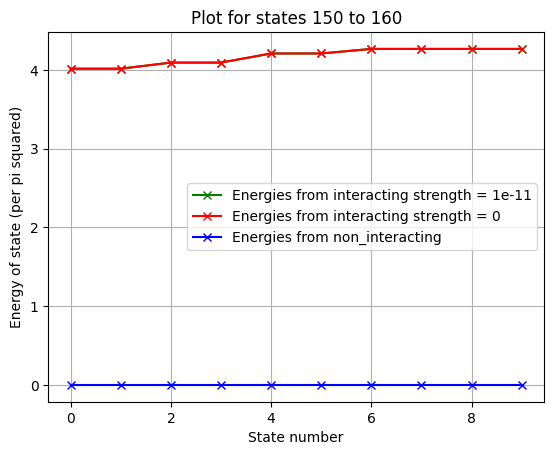

In [6]:
run(1e-11)

State 0 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
State 0 end
State 1 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
State 1 end
State 2 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
State 2 end
State 3 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve: solving eigenproblem...
TESTINGiDEA.methods.non_interacting.solve: convergence = 2.2162e-12, tolerance = 1e-10
State 3 end
State 4 start
iDEA.methods.interacting.solve: solving eigenproblem...
iDEA.methods.interacting.solve

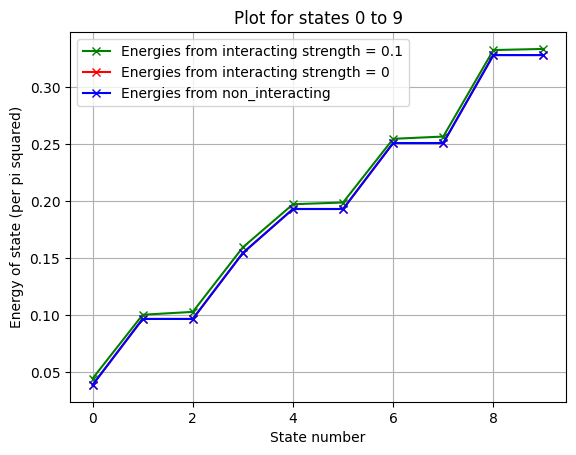

In [9]:
run(1e-1)